In [1]:
#Librerías a utilizar
import pandas as pd
import numpy as np

#Graficas 
import graphing
import missingno as ms
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
import plotly.figure_factory as ff
from sklearn.tree import plot_tree # Función para visualizar el árbol


#Selecionar caracteristicas 
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA

#Modelos 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

#Metricas
from sklearn.metrics import balanced_accuracy_score, roc_curve, confusion_matrix, roc_auc_score
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import cross_val_score # Para hacer cross-validation y evaluar el modelo

#Transformaciones, separaciones  e imputaciones  
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, OneHotEncoder, StandardScaler,MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, StratifiedKFold

#Funciones
from Funciones import matrix_confusion, fit_and_test_model, CurvaROC, FeatureBest,matrix_confusion_Xgboost


In [2]:
# Lee el archivo de texto prueba que contiene los datos usando pandas
Df_Spaces_test=pd.read_csv('test.csv')

# Lee el archivo de texto entrebamiento que contiene los datos usando pandas
Df_Spaces_train=pd.read_csv('train.csv')

In [3]:
#Train
total_cells_train=np.product(Df_Spaces_train.shape)
total_missing_train=Df_Spaces_train.isnull().sum().sum()

percent_missing_train = (total_missing_train/total_cells_train) * 100

print(percent_missing_train)

#test
total_cells_test=np.product(Df_Spaces_test.shape)
total_missing_test=Df_Spaces_test.isnull().sum().sum()

percent_missing_test = (total_missing_test/total_cells_test) * 100

print(percent_missing_test)

1.9095824226389047
2.008956673441125


In [4]:
Df_Spaces_train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [5]:
#Imputación de la columna objetivo a numeros 
label_encoder=LabelEncoder()
Df_Spaces_train['Transported']=label_encoder.fit_transform(Df_Spaces_train['Transported'])

# Visualización de los datos

In [6]:
#------------Train------------------------------
#Calcular el número de celdas vacías en cada columna 
datos_perdidos_train=Df_Spaces_train.isnull().sum().to_frame()

#Cambiar el nombre de las columnas con la suma
datos_perdidos_train=datos_perdidos_train.rename(columns={0:'celdas vacías'})

#Imprimir resultados
# print('Datos de Df_Spaces_train:')
# display(datos_perdidos_train)

#----------------------------test----------------------------
#Calcular el número de celdas vacías en cada columna 
datos_perdidos_test=Df_Spaces_test.isnull().sum().to_frame()

#Cambiar el nombre de las columnas con la suma
datos_perdidos_test=datos_perdidos_test.rename(columns={0:'celdas vacías'})

#Imprimir resultados
#print('Datos de Df_Spaces_test:')
#display(datos_perdidos_test)

In [7]:
#Visualiza datos faltantes
#Grafico matricial, establecer grafico y tamaña
# ms.matrix(Df_Spaces_train, figsize=(10,5), fontsize=11)
# ms.matrix(Df_Spaces_test, figsize=(10,5), fontsize=11)


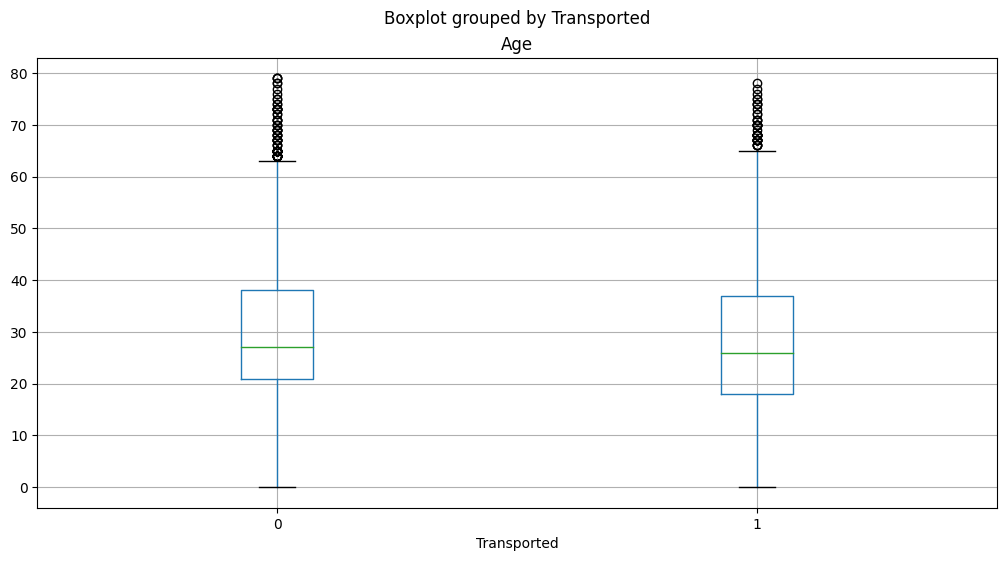

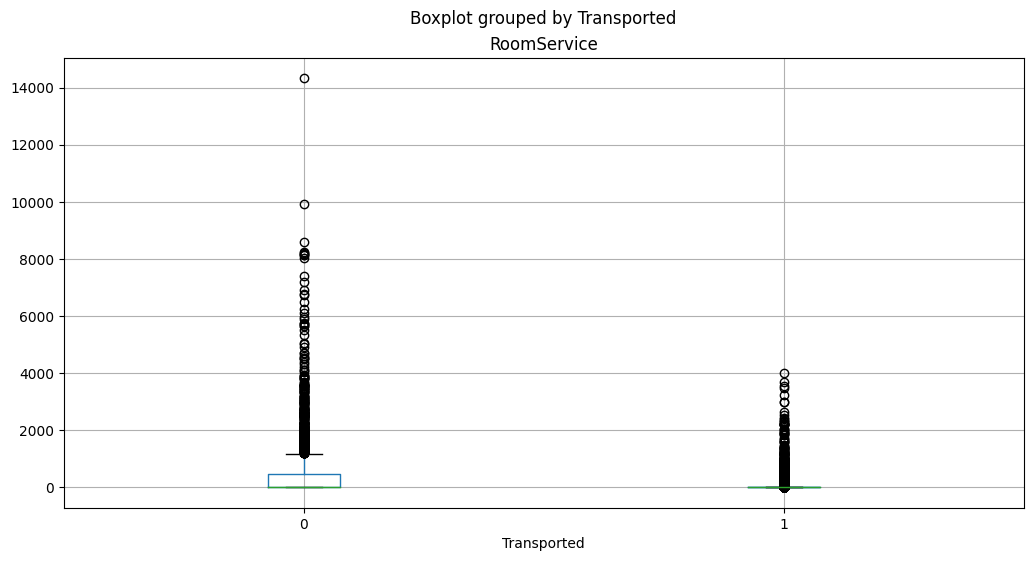

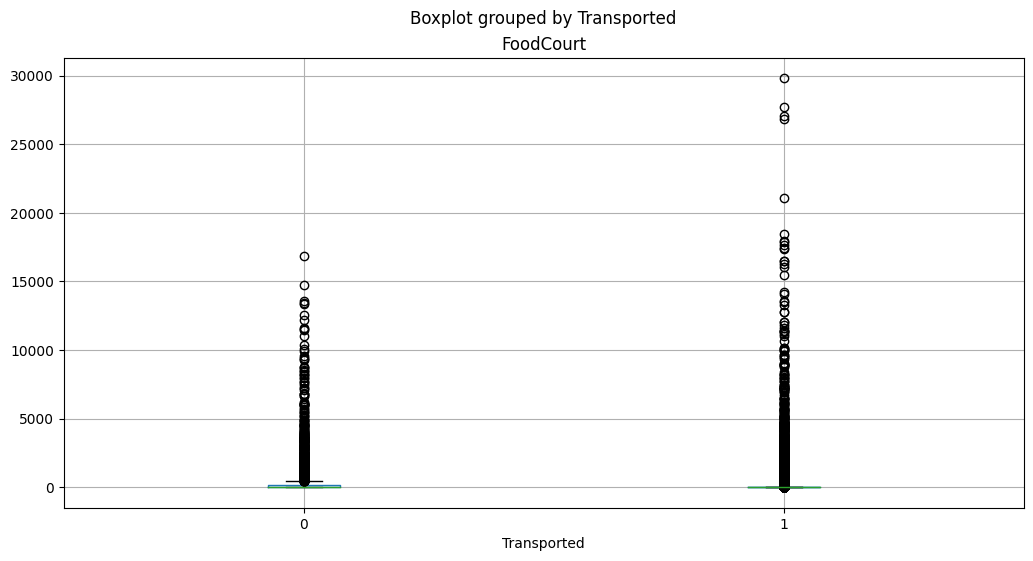

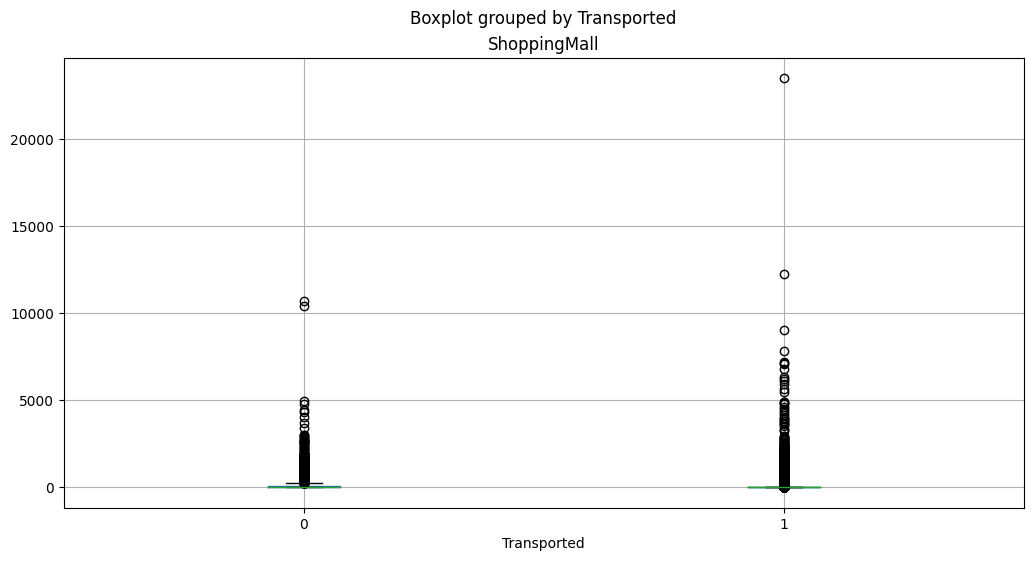

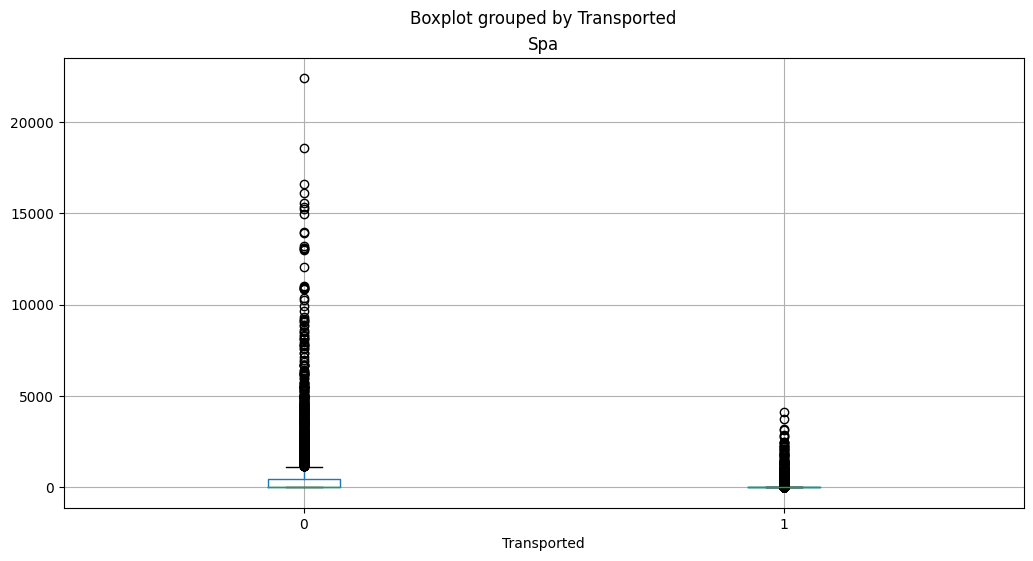

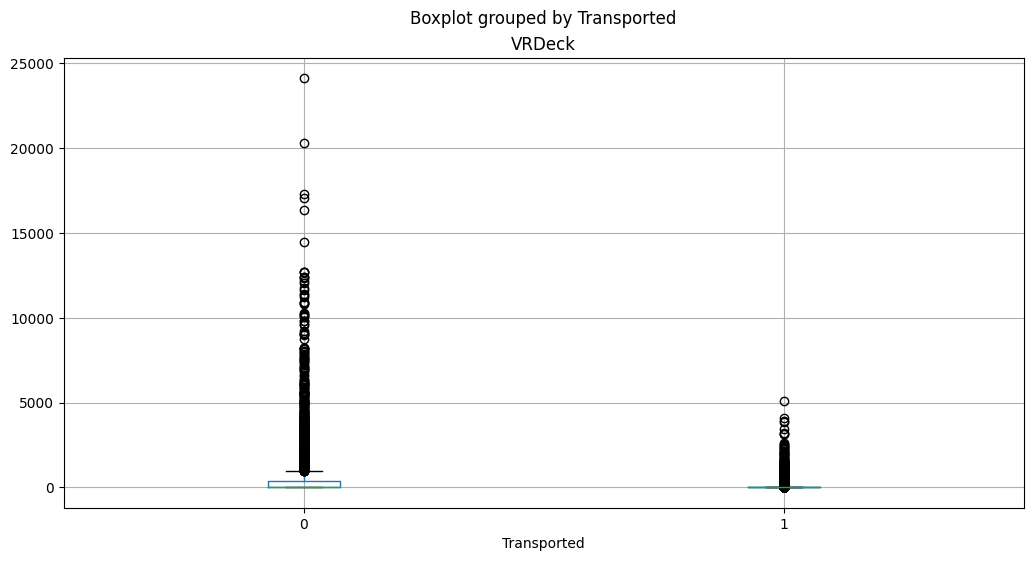

In [8]:
%matplotlib inline

features = ['Age','RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
for col in features:
    Df_Spaces_train.boxplot(column=col, by='Transported', figsize=(12,6))
    plt.title(col)
plt.show()

Para algunas de las características, hay una diferencia notable en la distribución para cada valor de etiqueta. En particular exepto **Age**, **ShoppingMall** y **FoodCourt**, El resto muestra distribuciones marcadamente diferentes para personas transportadas que para personas no transportadas. Estas características pueden ayudar a predecir si un persona es transportado o no.

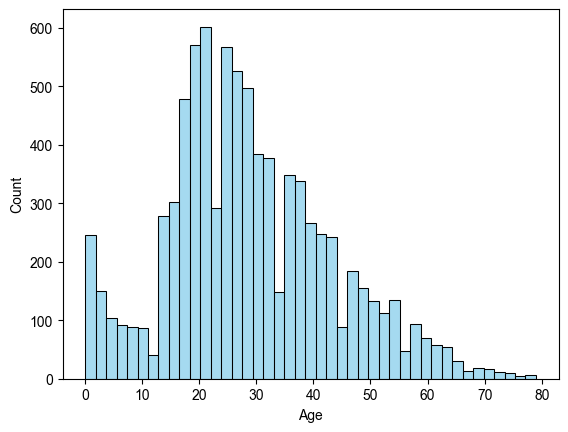

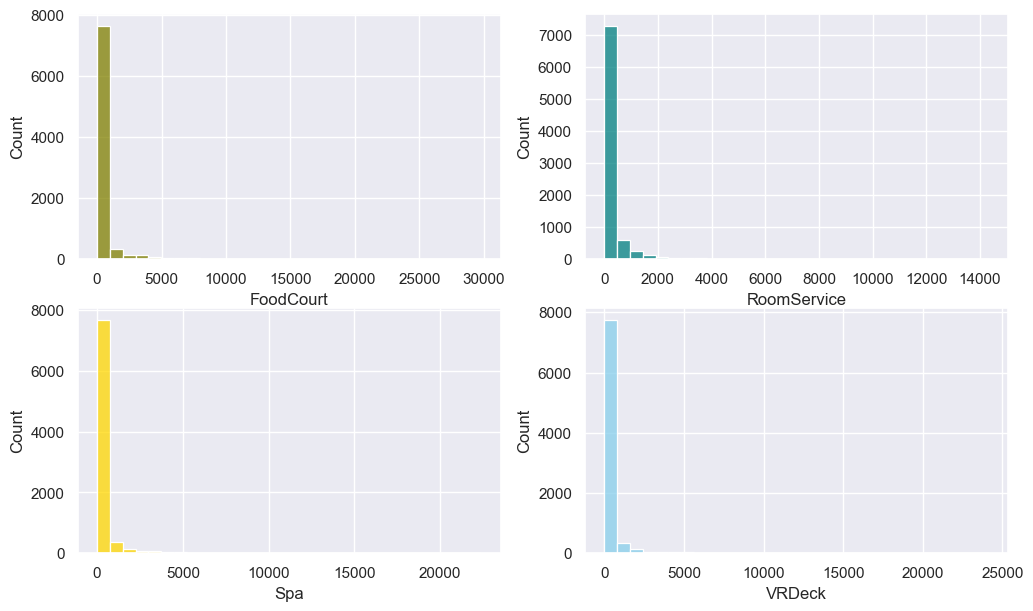

In [9]:
sns.histplot(data=Df_Spaces_train, x="Age", kde=False,   color="skyblue")

sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(12, 7))
sns.histplot(data=Df_Spaces_train, x="FoodCourt", kde=False, color="olive", bins=30, ax=axs[0, 0])
sns.histplot(data=Df_Spaces_train, x="Spa", kde=False, color="gold", bins=30,ax=axs[1, 0])
sns.histplot(data=Df_Spaces_train, x="RoomService", kde=False, color="teal",bins=30, ax=axs[0, 1])
sns.histplot(data=Df_Spaces_train, x="VRDeck", kde=False, color="skyblue",bins=30, ax=axs[1, 1])

plt.show()

#### 1. Edad


 El cero no se está tomando como un valor nulo, si no como un valor referente a una edad, lo que quiere decir que hay una incosistencia en esta columna(Age).

 *** Hay 178 valores en la edad con ceros.

En las siguientes graficas se observa que la mayoría de las personas que se transportarón no pagarón o pagarón poco por este servicio. Arriba podemos ver que la mayoría de Muestras de los Servicios son relativamente pequeñas, con tamaños que van desde 0 a 200, pero tenemos algunos valores atípicos mucho más grandes.

#### 2. RoomService      

En la grafica anterior se puede apreciar las personas salientes de Europa y Tierra tienden a gastar menos por  este servicio. A diferencia de Mars.

También que más de la mitad de las personas que son de de Europa y Earth.

Las personas que pagarón por el servicio fuerón mayor en Earth, seguido de Mars y Europa. A pesar de lo anterior, quien gasta más en este servicio es Mars.

De las personas que pagarón por este servicio, quien tiene mayor probabilidad de ser transportadas son las que provienen de Europa. Dado que el porcentaje de personas transportadas fue mas de la mitad.

En la tabla anterior se muestra que en el planeta Earth, es el que tiene mayor valores faltantes.

#### 3. FoodCourt   

En la grafica anterior se puede mirar que la mayoria de los pasajeros no pedierón comida

El planeta que pidio más este servicio fuen Europa. 

Las personas que pagarón por el servicio fuerón mayor en Earth, seguido de Europa y Mars. A pesar de lo anterior, quien gasta más en este servicio es europa.

De las personas que pagarón por este servicio, quien tiene mayor probabilidad de ser transportadas son las que provienen de Europa. Dado que el porcentaje de personas transportadas fue mas de la mitad.

         
#### 4. ShoppingMall  

Las personas que pagarón por el servicio fuerón mayor en Earth, seguido de Mars y Europa. A pesar de lo anterior, quien gasta más en este servicio es Mars.

De las personas que pagarón por este servicio, quien tiene mayor probabilidad de ser transportadas son las que provienen de Europa. Dado que el porcentaje de personas transportadas fue mas de la mitad.

#### 5. Spa                     


Las personas que pagarón por el servicio fuerón mayor en Earth, seguido de Europa y Mars. A pesar de lo anterior, quien gasta más en este servicio es Europa.

De las personas que pagarón por este servicio, quien tiene mayor probabilidad de ser transportadas son las que provienen de Europa. Dado que el porcentaje de personas transportadas fue mas de la mitad.

       
            
#### 6. VRDeck                  

Las personas que pagarón por el servicio fuerón mayor en Earth, seguido de Europa y Mars. A pesar de lo anterior, quien gasta más en este servicio es Europa.

De las personas que pagarón por este servicio, quien tiene mayor probabilidad de ser transportadas son las que provienen de Europa. Dado que el porcentaje de personas transportadas fue mas de la mitad.

In [10]:
labels, count=np.unique(Df_Spaces_train['Transported'], return_counts=True) #Funcion que devuelve las etiquetas y la frecuencia 
print('Etiquetas  {}'.format(labels))
print('Frecuencia  {}'.format(count))

Etiquetas  [0 1]
Frecuencia  [4315 4378]


Una información importante a tener en cuenta es que se trata de un conjunto de datos equilibrado: las clases no están representadas en la misma proporción.

# 2. Limpieza de datos

In [11]:
# Objetos_unicos=list(map(lambda col: Df_Spaces_train[col].nunique(), columnas_categoricas))
# d=dict(zip(columnas_categoricas, Objetos_unicos))

# #Me muestralas la salida ordenada de forma acendente la columnas categoricas
# sorted(d.items(), key=lambda x: x[1])

In [12]:
#Column Cabin
def Cambiar_Nulos_HomePlanet(df):
    """ Cambiar los nulos de HomePlanet, Dado el patrón en Desk, y CryoSleep """
    
    df[['Desk','Num','Side']]=df.Cabin.str.split('/', expand=True)
    df[['Group','Num_Group']]=df.PassengerId.str.split('_', expand=True)
    df.loc[(((df['Desk']=='A') | (df['Desk']=='B') | (df['Desk']=='C') | (df['Desk']=='T')) & (df['HomePlanet'].isnull())), 'HomePlanet']='Europa'
    df.loc[((df['Desk']=='G') & (df['HomePlanet'].isnull())), 'HomePlanet']='Earth'
    #df.loc[((df['Desk']=='T') & (df['CryoSleep'].isnull())), 'CryoSleep']='False'
    df.loc[(((df['Num_Group']=='7') | (df['Num_Group']=='8') ) & (df['VIP'].isnull())), 'VIP']='False'
    df.loc[(((df['Num_Group']=='8')) & (df['HomePlanet'].isnull())), 'HomePlanet']='Earth'

    #df.loc[((df['CryoSleep']==False) & (df['HomePlanet'].isnull())), 'HomePlanet']='Earth'
    #df.loc[((df['CryoSleep']==True) & (df['HomePlanet'].isnull())), 'HomePlanet']='Europa'

Cambiar_Nulos_HomePlanet(Df_Spaces_train)
Cambiar_Nulos_HomePlanet(Df_Spaces_test)

def eliminar_problema(df):
    df.drop(['Desk','Num','Side'], axis=1, inplace=True)
    df.drop(['Group','Num_Group'], axis=1, inplace=True)
eliminar_problema(Df_Spaces_train)
eliminar_problema(Df_Spaces_test)

In [13]:

# Columnas númericas 
def LimpiezaVariables(df):
    """ Esta funcion reemplaza los valores faltantes por el criterio más adecuado """
    
    #Remplar los valores ceros en edad por Valores perdidos
    df.Age.replace(0,np.nan, inplace=True)
    #Columnas númericas 
     #Llenar los valores perdidos de la edad utilizando la mediana por sexo
     
    # Se Reemplazan los valores faltantes en las columnas númericas 
    df['Age']=SimpleImputer(missing_values=np.nan,strategy='mean').fit_transform(df[['Age']])
    df['RoomService']=SimpleImputer(missing_values=np.nan,strategy='median').fit_transform(df[['RoomService']])
    df['FoodCourt']=SimpleImputer(missing_values=np.nan,strategy='median').fit_transform(df[['FoodCourt']])
    df['ShoppingMall']=SimpleImputer(missing_values=np.nan,strategy='median').fit_transform(df[['ShoppingMall']])
    df['VRDeck']=SimpleImputer(missing_values=np.nan,strategy='median').fit_transform(df[['VRDeck']])
    df['Spa']=SimpleImputer(missing_values=np.nan,strategy='median').fit_transform(df[['Spa']])

    # Columnas Categorícas 
    df['HomePlanet']=SimpleImputer(missing_values=np.nan, strategy='most_frequent').fit_transform(df[['HomePlanet']])
    df['CryoSleep']=SimpleImputer(missing_values=np.nan, strategy='most_frequent').fit_transform(df[['CryoSleep']])
    df['VIP']=SimpleImputer(missing_values=np.nan, strategy='most_frequent').fit_transform(df[['VIP']])
    df['Destination']=SimpleImputer(missing_values=np.nan, strategy='most_frequent').fit_transform(df[['Destination']])
    df['Cabin']=SimpleImputer(missing_values=np.nan, strategy='most_frequent').fit_transform(df[['Cabin']])

LimpiezaVariables(Df_Spaces_train)
LimpiezaVariables(Df_Spaces_test)

# 3. Ingeniería de característica 

In [14]:
#Column Total
def agregar_Caracteristicas(df):
    df['Total']=df[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum(axis=1)

    #Column PassengerId
    df[['Group','Num_Group']]=df.PassengerId.str.split('_', expand=True)
    #Columna Cabin
    df[['Desk','Num','Side']]=df.Cabin.str.split('/', expand=True)

    #Convertir a integer 

agregar_Caracteristicas(Df_Spaces_train)
agregar_Caracteristicas(Df_Spaces_test)


# 4. Preprocesamiento

In [15]:
#Características de entrenamiento
X=Df_Spaces_train.copy()
#X.set_index('')
#Caracteristicas de Prueba 
X_test=Df_Spaces_test.copy()

#Variable Objetivo
y=X.Transported

#Características
X.drop(['Transported'], axis=1, inplace=True)
#Columnas númericas
columnas_numericas=[num for num in X.columns if X[num].dtype in ['int64', 'float64']]

#Columnas categorícas 
columnas_categoricas=[num for num in X.columns if X[num].dtype=='object']


#Hacer una divición de los datos, prueba y Entrenamiento
X_train, X_valid, y_train, y_valid=train_test_split(X,y, train_size=0.7, test_size=0.3, random_state=0) 


In [16]:
# Columns that will be one-hot encoded
low_cardinality_cols = [col for col in columnas_categoricas if X[col].nunique()<=10]

# Columns that will be dropped from the dataset
high_cardinality_cols = list(set(columnas_categoricas)-set(low_cardinality_cols))

print('Categorical columns that will be one-hot encoded:', low_cardinality_cols)
print('\nCategorical columns that will be dropped from the dataset:', high_cardinality_cols)

Categorical columns that will be one-hot encoded: ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Num_Group', 'Desk', 'Side']

Categorical columns that will be dropped from the dataset: ['PassengerId', 'Name', 'Num', 'Cabin', 'Group']


In [17]:
# Columns that can be safely label encoded
good_label_cols = [col for col in columnas_categoricas if 
                   set(X_train[col]) == set(X_valid[col])]
        
# Problematic columns that will be dropped from the dataset
bad_label_cols = list(set(columnas_categoricas)-set(good_label_cols))
        
print('Categorical columns that will be label encoded:', good_label_cols)
print('\nCategorical columns that will be dropped from the dataset:', bad_label_cols)

Categorical columns that will be label encoded: ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Num_Group', 'Side']

Categorical columns that will be dropped from the dataset: ['PassengerId', 'Name', 'Num', 'Desk', 'Cabin', 'Group']


In [18]:
label_X_train = X.copy()
Ordinal_encoder=OrdinalEncoder()
label_x_train_Ordinal=label_X_train.drop(bad_label_cols, axis=1)
label_x_train_Ordinal[good_label_cols]=Ordinal_encoder.fit_transform(label_X_train[good_label_cols])


### Normalización

In [19]:
#Normalizar
scaler = MinMaxScaler() # primero creo un objeto MinMaxScaler. Por defecto, esto normaliza los datos al intervalo [0,1]
scaler.fit(X_train[columnas_numericas]) # encuentro los parametros para el escaleo
x_train_normalizado=pd.DataFrame(scaler.transform(X_train[columnas_numericas])) # aplico la transformacion

scaler = MinMaxScaler() # primero creo un objeto MinMaxScaler. Por defecto, esto normaliza los datos al intervalo [0,1]
scaler.fit(X_valid[columnas_numericas]) # encuentro los parametros para el escaleo
x_valid_normalizado=pd.DataFrame(scaler.transform(X_valid[columnas_numericas])) # aplico la transformacion
    
#X_train=np.concatenate((x_train_normalizado, X_valid[good_label_cols].values), axis=1)
#X_valid=np.concatenate((x_valid_normalizado, X_valid[good_label_cols].values), axis=1)

x_train_normalizado.index=X_train.index # Ubicación dentro del dataframe 
x_valid_normalizado.index=X_valid.index

#Train
x_train_normalizado=pd.concat([x_train_normalizado,X_train[columnas_categoricas]], axis=1)
#Valid
x_valid_normalizado=pd.concat([x_valid_normalizado,X_valid[columnas_categoricas]], axis=1)

x_train_normalizado.rename({0:'Age',1:'RoomService', 2:'FoodCourt', 3:'ShoppingMall',4:'Spa', 5:'VRDeck', 6:'Total'} , axis=1, inplace=True)
x_valid_normalizado.rename({0:'Age',1:'RoomService', 2:'FoodCourt', 3:'ShoppingMall',4:'Spa', 5:'VRDeck', 6:'Total'} , axis=1, inplace=True)

In [20]:
#Normalizar datos de prueba
scaler = MinMaxScaler() # primero creo un objeto MinMaxScaler. Por defecto, esto normaliza los datos al intervalo [0,1]
scaler.fit(Df_Spaces_test[columnas_numericas]) # encuentro los parametros para el escaleo
x_test_normalizado=pd.DataFrame(scaler.transform(Df_Spaces_test[columnas_numericas])) # aplico la transformacion


x_test_normalizado.index=Df_Spaces_test.index # Ubicación dentro del dataframe 

#Train
x_test_normalizado=pd.concat([x_test_normalizado,Df_Spaces_test[columnas_categoricas]], axis=1)
#Valid

x_test_normalizado.rename({0:'Age',1:'RoomService', 2:'FoodCourt', 3:'ShoppingMall',4:'Spa', 5:'VRDeck', 6:'Total'} , axis=1, inplace=True)

## Label Encoding 

In [21]:
label_X_train = x_train_normalizado.copy()
label_X_valid = x_valid_normalizado.copy()
Ordinal_encoder=OrdinalEncoder()
label_x_train_Ordinal=label_X_train.drop(bad_label_cols, axis=1)
label_x_valid_Ordinal=label_X_valid.drop(bad_label_cols, axis=1)

label_x_train_Ordinal[good_label_cols]=Ordinal_encoder.fit_transform(label_X_train[good_label_cols])
label_x_valid_Ordinal[good_label_cols]=Ordinal_encoder.transform(label_X_valid[good_label_cols])

### Modelo Logistico

In [22]:
#Modelo logistico con OrdinalLabel

# train a logistic regression model on the training set
model_Logistic = LogisticRegression(C=0.01, solver="liblinear", class_weight='balanced')
train_accuracy, test_accuracy = fit_and_test_model(model_Logistic,label_x_train_Ordinal,label_x_valid_Ordinal, y_train, y_valid)

print('Con OrdinalLabel')
print("Model trained!")
print("Train accuracy", train_accuracy)
print("Test accuracy", test_accuracy)


Con OrdinalLabel
Model trained!
Train accuracy 0.7224433970377304
Test accuracy 0.7205673320924598


### Modelo de Tree

In [23]:
model_Tree = DecisionTreeClassifier(ccp_alpha=0.001) 
train_accuracy, test_accuracy =fit_and_test_model(model_Tree,label_x_train_Ordinal,label_x_valid_Ordinal, y_train, y_valid)
print('Con LabelOrdinal')
print("Model trained!")
print("Train accuracy", train_accuracy)
print("Test accuracy", test_accuracy)


Con LabelOrdinal
Model trained!
Train accuracy 0.8037835640840478
Test accuracy 0.7806235536619002


In [24]:
# features=['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService',
#        'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Total', 'Num_Group',
#        'Side']
# fig, ax = plt.subplots(figsize = (15, 8))
# plot_tree(model_Tree, feature_names=features, fontsize = 12, filled = True, ax = ax)

### Model Forest

In [25]:
rf = RandomForestClassifier(n_estimators=15,
                                max_depth=9,
                                random_state=2, 
                                criterion="entropy", 
                                verbose=False)
    # Train and test the result
#Modelo con LabeLEncoder
train_accuracy, test_accuracy=fit_and_test_model(rf,label_x_train_Ordinal,label_x_valid_Ordinal, y_train, y_valid)
print('Con LabelEncoder')
print("Model trained!")
print("Train accuracy", train_accuracy)
print("Test accuracy", test_accuracy)

Con LabelEncoder
Model trained!
Train accuracy 0.8394378878887314
Test accuracy 0.7760370262553553


### XGboost

In [26]:

model = XGBClassifier(n_estimators=1000, early_stopping_rounds=5, learning_rate=0.05, n_jobs=5)
model.fit(label_x_train_Ordinal, y_train, 
             eval_set=[(label_x_valid_Ordinal, y_valid)],
             verbose=False)
predictions = model.predict(label_x_train_Ordinal)
train_accuracy = balanced_accuracy_score(y_train, predictions)

    # -- Test
predictions = model.predict(label_x_valid_Ordinal)
test_accuracy = balanced_accuracy_score(y_valid, predictions)

print("Model trained!")
print("Train accuracy", train_accuracy)
print("Test accuracy", test_accuracy)

Model trained!
Train accuracy 0.8333518080838593
Test accuracy 0.78637950147464


### KNN

In [27]:
clf = KNeighborsClassifier(n_neighbors=5) # clasificador
clf.fit(label_x_train_Ordinal, y_train) # una sola vez

y_pred = clf.predict(label_x_train_Ordinal) # predigo etiquetas
accuracy_train =  balanced_accuracy_score(y_pred,y_train) # acuraccy

y_pred = clf.predict(label_x_valid_Ordinal) # predigo etiquetas
accuracy_valid =  balanced_accuracy_score(y_pred,y_valid) # acuraccy

print('Accuracy train promedio :', accuracy_train) # el promedio
print('Accuracy valid promedio:', accuracy_valid) # el promedio


Accuracy train promedio : 0.8261125554564475
Accuracy valid promedio: 0.7313589444817156


### Curva ROC

Modelo Logistico
AUC entrenamiento: 0.7662
AUC evaluacion: 0.7662


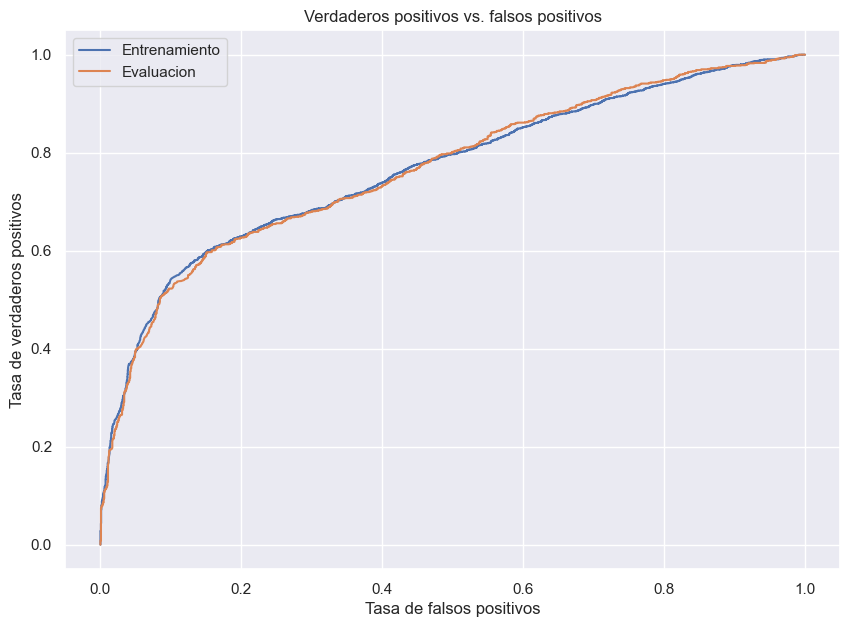

Modelo De Arbol de desición
AUC entrenamiento: 0.8782
AUC evaluacion: 0.8555


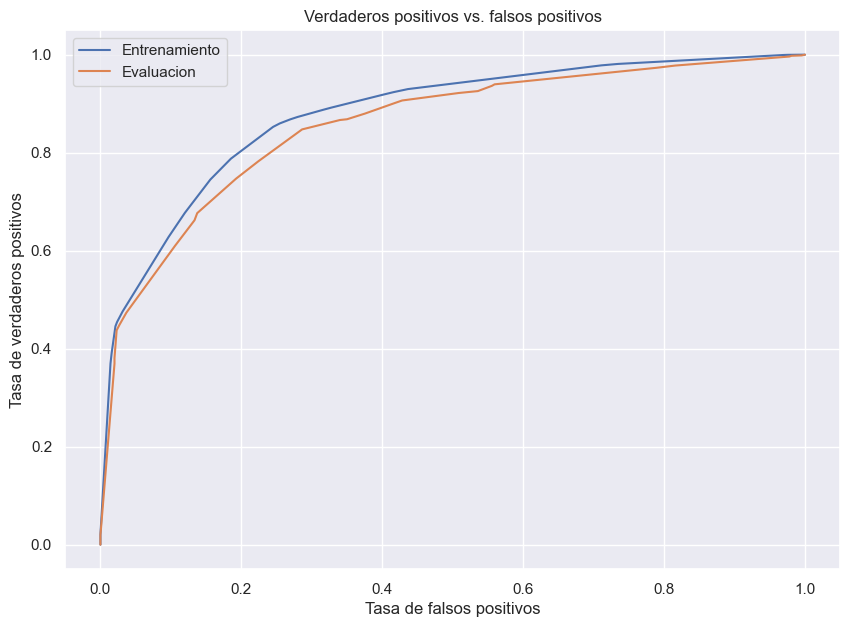

Modelo de Bosque Aleatorio
AUC entrenamiento: 0.9245
AUC evaluacion: 0.8663


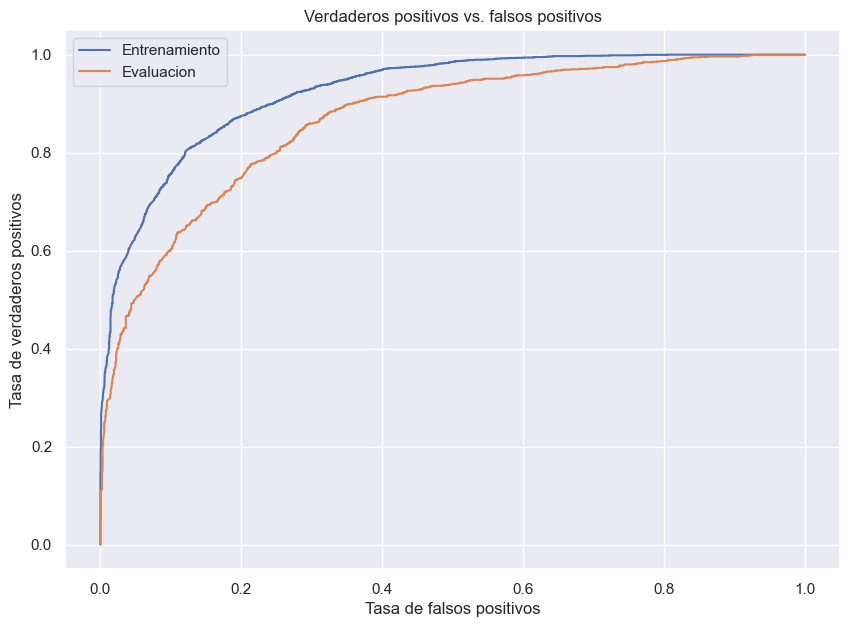

Modelo de aumento del gradiente
AUC entrenamiento: 0.9201
AUC evaluacion: 0.8689


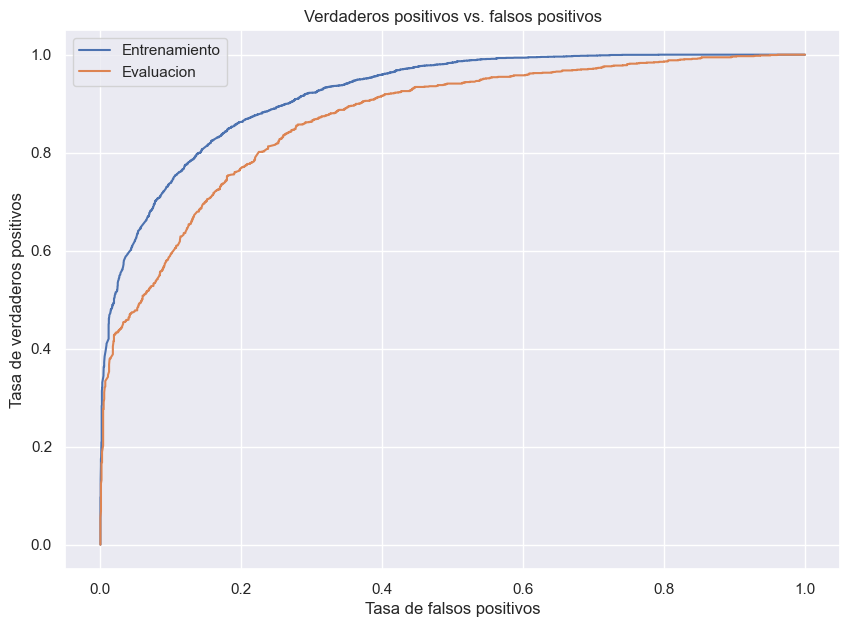

Modelo de KNN
AUC entrenamiento: 0.9083
AUC evaluacion: 0.8034


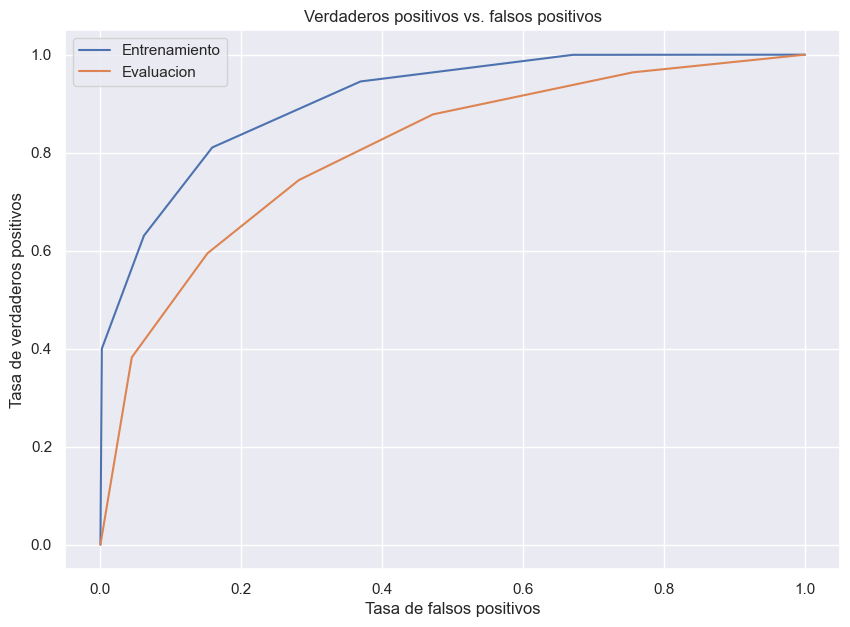

In [28]:
print('Modelo Logistico')
CurvaROC(model_Logistic,label_x_valid_Ordinal,label_x_train_Ordinal,y_train,y_valid)
print('Modelo De Arbol de desición')
CurvaROC(model_Tree,label_x_valid_Ordinal,label_x_train_Ordinal,y_train,y_valid)
print('Modelo de Bosque Aleatorio')
CurvaROC(rf,label_x_valid_Ordinal,label_x_train_Ordinal,y_train,y_valid)
print('Modelo de aumento del gradiente')
CurvaROC(model,label_x_valid_Ordinal,label_x_train_Ordinal,y_train,y_valid)
print('Modelo de KNN')
CurvaROC(clf,label_x_valid_Ordinal,label_x_train_Ordinal,y_train,y_valid)

El gráfico ROC muestra la curva de las tasas positivas verdaderas y falsas para diferentes valores umbral entre 0 y 1. Un clasificador perfecto tendría una curva que va hacia arriba por el lado izquierdo y recto por la parte superior. La línea diagonal a través del gráfico representa la probabilidad de predecir correctamente con una predicción aleatoria 50/50; ¡así que obviamente desea que la curva sea más alta que esa ( o su modelo no es mejor que simplemente adivinar! ).

El área bajo la curva ( AUC ) es un valor entre 0 y 1 que cuantifica el rendimiento general del modelo. Cuanto más cerca esté este valor, mejor será el modelo. Una vez más, scikit-Learn incluye una función para calcular esta métrica.

### Matrix de confusión 

In [29]:
print('Modelo Logistico')
matrix_confusion(model_Logistic,label_x_train_Ordinal, label_x_valid_Ordinal, y_train, y_valid)
print('Modelo De arbol de desición')
matrix_confusion(model_Tree,label_x_train_Ordinal, label_x_valid_Ordinal, y_train, y_valid)
print('Modelo de Bosque aleatorio')
matrix_confusion(rf,label_x_train_Ordinal, label_x_valid_Ordinal, y_train, y_valid)
print('Modelo de aumento del gradiente')
matrix_confusion_Xgboost(model,label_x_train_Ordinal, label_x_valid_Ordinal, y_train, y_valid)
print('KNN')
matrix_confusion(clf,label_x_train_Ordinal, label_x_valid_Ordinal, y_train, y_valid)

Modelo Logistico


Modelo De arbol de desición


Modelo de Bosque aleatorio


Modelo de aumento del gradiente


KNN


## OneHotEncoding

In [30]:
#### One-hot encoding
X_train_hot = x_train_normalizado.copy()
X_valid_hot = x_valid_normalizado.copy()
encoder = OneHotEncoder(sparse_output=False) # armamos el encoder. sparse=False nos devuelve una matriz comun a la que estamos acostumbrados (en vez de esparsa)

encoder.fit(X_train_hot[good_label_cols]) # fiteo reshapeando el vector y_train como veníamos haciendo pues no tiene formato de matriz
encoder.fit(X_valid_hot[good_label_cols]) 


X_train_cater=pd.DataFrame(encoder.transform(X_train[good_label_cols])) # obtenemos la mariz binaria
X_valid_cater=pd.DataFrame(encoder.transform(X_valid[good_label_cols]))# obtenemos la mariz binaria

X_train_cater.index=X_train_hot.index
X_valid_cater.index=X_valid_hot.index


X_train_OneHot=pd.concat([X_train_cater,X_train[columnas_numericas]], axis=1) #Concatenamos las columnas númericas y categorícas
X_valid_OneHot=pd.concat([X_valid_cater,X_valid[columnas_numericas]], axis=1)

X_train_OneHot.columns = X_train_OneHot.columns.astype(str)
X_valid_OneHot.columns = X_valid_OneHot.columns.astype(str)

# X_valid_OneHot.drop([['0', '1', '3','5','7','RoomService','Spa', 'VRDeck', 'Total'], axis=1, inplace=True)
# X_train_OneHot.drop(['5','6','7','8','9','10','11','12','13','14','15','16','17','18','19'], axis=1, inplace=True)


In [31]:
# # Calcular la correlación entre las variables
# corr = X_train_OneHot.corr()

# # Visualizar la matriz de correlación
# plt.figure(figsize = (12, 5))
# sns.heatmap(corr, cmap='coolwarm', annot=True)
# plt.show

# # Identificar relaciones lógicas y razonables entre las variables

In [32]:

# encoder = OneHotEncoder(sparse_output=False) # armamos el encoder. sparse=False nos devuelve una matriz comun a la que estamos acostumbrados (en vez de esparsa)

# encoder.fit(x_test_normalizado[good_label_cols]) # fiteo reshapeando el vector y_train como veníamos haciendo pues no tiene formato de matriz


# X_prueba_normalizado=pd.DataFrame(encoder.transform(x_test_normalizado[good_label_cols]))# obtenemos la mariz binaria

# X_prueba_normalizado.index=x_test_normalizado.index

# x_test_normalizado=pd.concat([X_prueba_normalizado,x_test_normalizado[columnas_numericas]], axis=1) #Concatenamos las columnas númericas y categorícas

# x_test_normalizado.columns = x_test_normalizado.columns.astype(str)

### Modelo Logistico 

In [33]:

#Modelo logistico con OrdinalLabel
# Set regularization rate
reg = 0.01
# train a logistic regression model on the training set
model_Logistic = LogisticRegression(C=1/reg, solver="liblinear", class_weight='balanced')


#Modelo logistico con OneHotEncoder
train_accuracy, test_accuracy = fit_and_test_model(model_Logistic, X_train_OneHot, X_valid_OneHot, y_train, y_valid)
print('Con OneHotEncoder')
print("Model trained!")
print("Train accuracy", train_accuracy)
print("Test accuracy", test_accuracy)


Con OneHotEncoder
Model trained!
Train accuracy 0.7914725737466664
Test accuracy 0.7910077833940539


### Modelo de Tree

In [34]:
# fit a simple tree using only three levels
model_Tree = DecisionTreeClassifier(ccp_alpha=0.001, max_features=19) 
#Modelo logistico con OneHotEncoder

train_accuracy, test_accuracy = fit_and_test_model(model_Tree,X_train_OneHot,X_valid_OneHot, y_train, y_valid)
print('Con OneHotEncoder')
print("Model trained!")
print("Train accuracy", train_accuracy)
print("Test accuracy", test_accuracy)


Con OneHotEncoder
Model trained!
Train accuracy 0.8015353165924004
Test accuracy 0.7836939805870919


### Modelo RandomForestClassifier

In [35]:
import graphing

# n_estimators states how many trees to put in the model
# We will make one model for every entry in this list
# and see how well each model performs 
#estimators =  range(1, len(X_train_OneHot.columns)+1)
#n_estimators = [0, 0.5, 0.8, 1]
#n_estimators= [2, 10, 20, 50, 100, 500]
n_estimators =list(np.linspace(1,100))

# Train our models and report their performance
train_accuracies = []
test_accuracies = []

for n_estimator in n_estimators:
    print("Preparing a model with", n_estimator, "trees...")

    # Prepare the model 
    rf = RandomForestClassifier(n_estimators=72,
                                min_samples_split=56,
                                max_depth=n_estimator,
                                #random_state=2, 
                                #criterion="entropy", 
                                #verbose=False
                                )
    
    # Train and test the result
    train_accuracy, test_accuracy = fit_and_test_model(rf,X_train_OneHot,X_valid_OneHot, y_train, y_valid)

    # Save the results
    test_accuracies.append(test_accuracy)
    train_accuracies.append(train_accuracy)


# Plot results
graphing.line_2D(dict(Train=train_accuracies, Test=test_accuracies), 
                    n_estimators,
                    label_x="Numer of trees (n_estimators)",
                    label_y="Accuracy",
                    title="Performance X number of trees", show=True)
# rf = RandomForestClassifier(n_estimators=15,
#                                 max_depth=9,
#                                 random_state=2, 
#                                 criterion="entropy", 
#                                 verbose=False)
#     # Train and test the result
#Modelo con LabeLEncoder
# train_accuracy, test_accuracy=fit_and_test_model(rf,label_x_train_Ordinal,label_x_valid_Ordinal, y_train, y_valid)
# print('Con LabelEncoder')
# print("Model trained!")
# print("Train accuracy", train_accuracy)
# print("Test accuracy", test_accuracy)

In [36]:
# features=['0', '1', '2', '3', '4', '5', '6', '7', '10', '11', '12',
#        '13', '14', '16', '18', '19', 'Age', 'RoomService',
#        'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Total']
# X_train_OneHot=X_train_OneHot[features]
# X_valid_OneHot=X_valid_OneHot[features]
#Modelo
rf = RandomForestClassifier(n_estimators=182,
                                max_depth=10,
                                random_state=2, 
                                criterion="gini", 
                                max_features=23,
                                min_samples_split=50,
                                verbose=False
                               )

#Modelo logistico con OneHotEncoder
train_accuracy, test_accuracy = fit_and_test_model(rf,X_train_OneHot,X_valid_OneHot, y_train, y_valid)
print('Con OneHotEncoder')
print("Model trained!")
print("Train accuracy", train_accuracy)
print("Test accuracy", test_accuracy)


Con OneHotEncoder
Model trained!
Train accuracy 0.8255813928362913
Test accuracy 0.7948392010185749


In [37]:
features=['0', '1', '2', '3', '4', '5', '6', '7', '10', '11', '12',
       '13', '14', '16', '18', '19', 'Age', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Total']

### Modelo Kgboost

In [38]:
features=['0', '1', '2', '3', '5', '6', '7', '8', '10', '11', '12',
       '13', '14', '15', '16', '18', 'Age', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Total']

X_train_xgb=X_train_OneHot[features].copy()
X_valid_xgb=X_valid_OneHot[features].copy()
model=XGBClassifier(subsample=0.73, 
               n_estimators=14, 
               max_depth=6, 
               learning_rate=0.3,
               gamma=0.02, 
               colsample_bytree=1
               )

model.fit(X_train_xgb, y_train, 
             eval_set=[(X_valid_xgb, y_valid)],
             verbose=False)
predictions = model.predict(X_train_xgb)
train_accuracy = balanced_accuracy_score(y_train, predictions)

    # -- Test
predictions = model.predict(X_valid_xgb)
test_accuracy = balanced_accuracy_score(y_valid, predictions)

print("Model trained!")
print("Train accuracy", train_accuracy)
print("Test accuracy", test_accuracy)

Model trained!
Train accuracy 0.8305099917068897
Test accuracy 0.793681542446991


In [39]:
# features=['0', '1', '2', '3', '5', '6', '7', '8', '10', '11', '12',
#        '13', '14', '15', '16', '18', 'Age', 'RoomService',
#        'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Total']
# preds_test=model.predict(x_test_normalizado[features])

In [40]:
# # Save test predictions to file
# output = pd.DataFrame({'PassengerId': x_test_normalizado.index,
#                        'Transported': preds_test})
# output.to_csv('submission.csv', index=False)

### KNN

In [41]:
features=['0','1','3','5','7','RoomService','Spa','VRDeck','Total']

X_valid_knn=X_valid_OneHot[features].copy()
X_train_knn=X_train_OneHot[features].copy()

#Train
scaler.fit(X_train_knn)
X_train_knn=pd.DataFrame(scaler.transform(X_train_knn))

#Test
scaler.fit(X_valid_knn)
X_valid_knn=pd.DataFrame(scaler.transform(X_valid_knn))



clf = KNeighborsClassifier(n_neighbors=9, p=2, weights='uniform') # clasificador
clf.fit(X_train_knn, y_train) # una sola vez

y_pred = clf.predict(X_valid_knn) # predigo etiquetas
accuracy =  balanced_accuracy_score(y_pred,y_valid) # acuraccy

print('Accuracy promedio:', accuracy) # el promedio

Accuracy promedio: 0.7801226216814485


### SVM

In [42]:
# Prepare the model 
rf=SVC(kernel='linear',C=0.5, gamma=0.3) 
    
    # Train and test the result
train_accuracy, test_accuracy = fit_and_test_model(rf,X_train_OneHot,X_valid_OneHot, y_train, y_valid)
print("Model trained!")
print("Train accuracy", train_accuracy)
print("Test accuracy", test_accuracy)


### Curva ROC

Modelo Logistico
AUC entrenamiento: 0.8759
AUC evaluacion: 0.8732


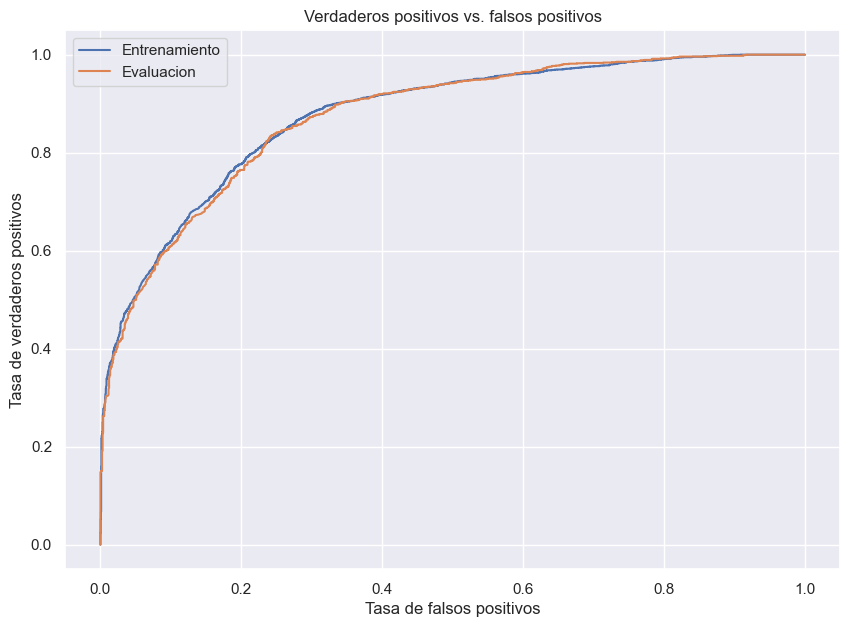

Modelo de arbol de desición
AUC entrenamiento: 0.8735
AUC evaluacion: 0.8625


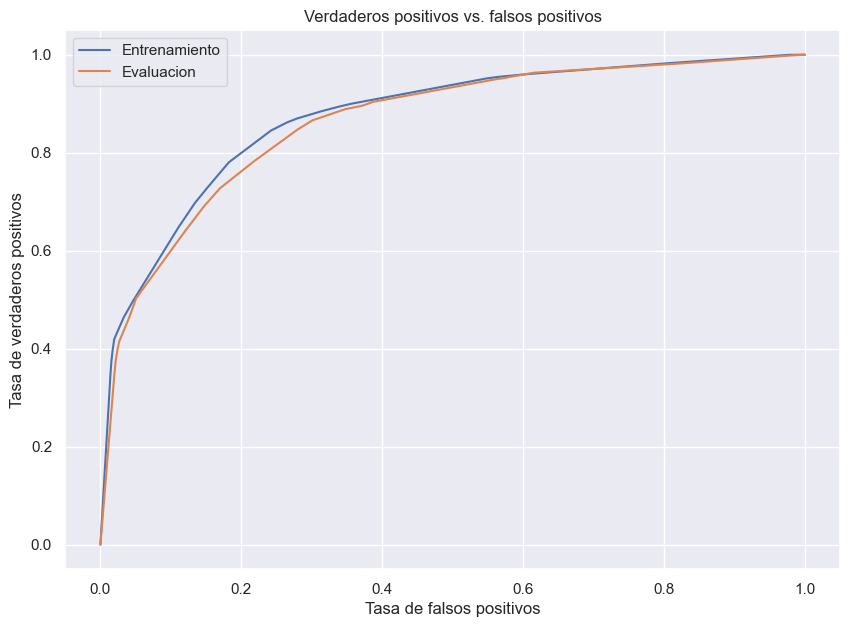

Modelo aumento del Gradiente
AUC entrenamiento: 0.9168
AUC evaluacion: 0.8782


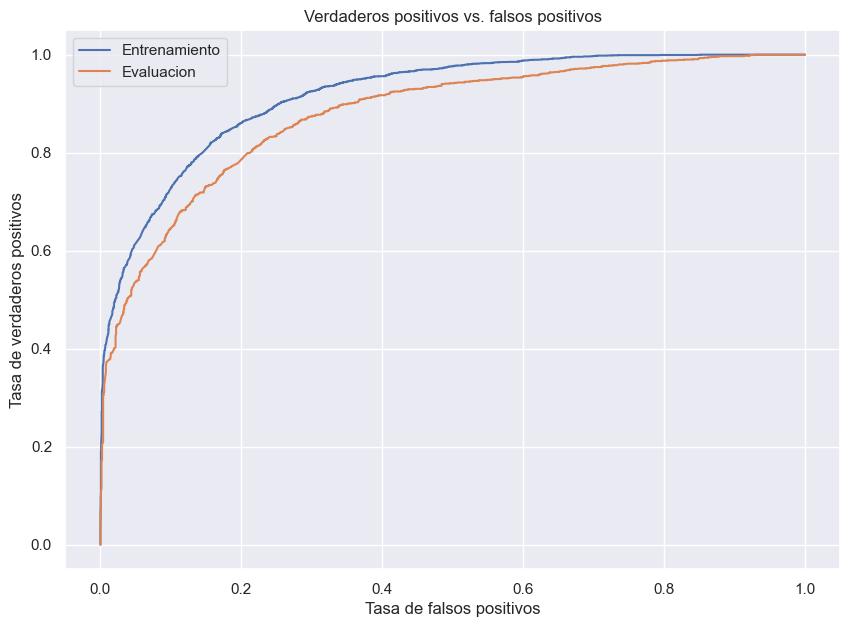

Modelo KNN
AUC entrenamiento: 0.8681
AUC evaluacion: 0.8361


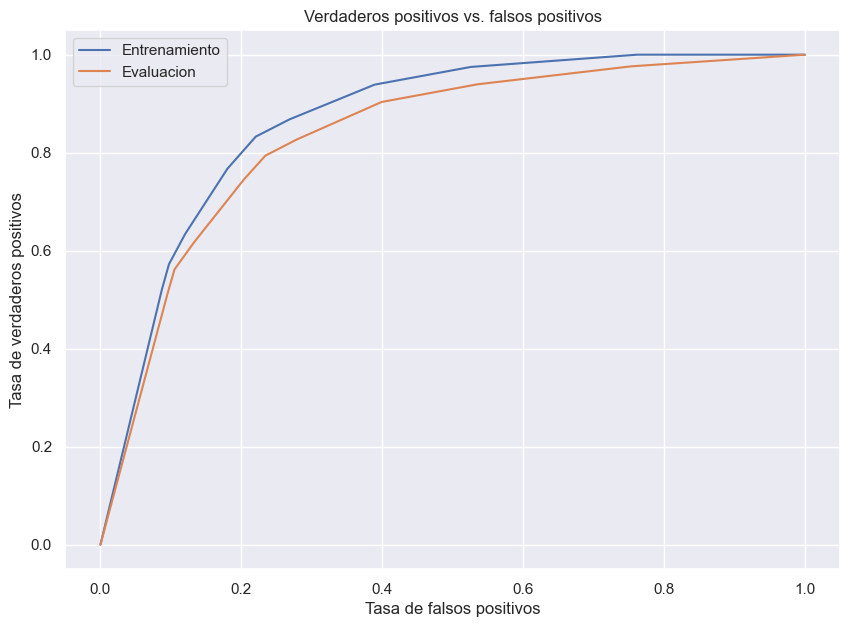

Modelo de RandonForest 
AUC entrenamiento: 0.9191
AUC evaluacion: 0.8772


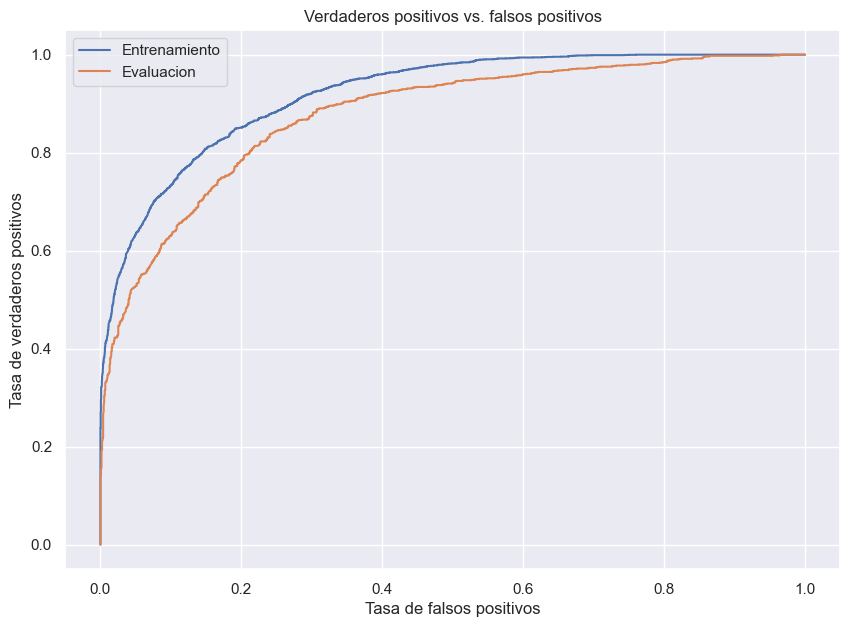

In [43]:
print('Modelo Logistico')
CurvaROC(model_Logistic,X_valid_OneHot,X_train_OneHot,y_train, y_valid)
print('Modelo de arbol de desición')
CurvaROC(model_Tree,X_valid_OneHot,X_train_OneHot,y_train, y_valid)
print('Modelo aumento del Gradiente')
CurvaROC(model,X_valid_xgb,X_train_xgb,y_train, y_valid)
print('Modelo KNN')
CurvaROC(clf,X_valid_knn,X_train_knn,y_train, y_valid)
print('Modelo de RandonForest ')
CurvaROC(rf,X_valid_OneHot,X_train_OneHot,y_train, y_valid)

### Matriz de confución

In [44]:
print('Modelo Logistico')
matrix_confusion(model_Logistic,X_train_OneHot, X_valid_OneHot, y_train, y_valid)
print('Modelo De arbol de desición')
matrix_confusion(model_Tree,X_train_OneHot, X_valid_OneHot, y_train, y_valid)
print('Modelo de Bosque aleatorio')
matrix_confusion(rf,X_train_OneHot, X_valid_OneHot, y_train, y_valid)
print('Modelo de aumento del gradiente')
matrix_confusion_Xgboost(model,X_train_xgb, X_valid_xgb, y_train, y_valid)
print('KNN')
matrix_confusion(clf,X_train_knn, X_valid_knn, y_train, y_valid)

Modelo Logistico


Modelo De arbol de desición


Modelo de Bosque aleatorio


Modelo de aumento del gradiente


KNN


La matriz de confusión nos muestra que, a pesar de las métricas reportadas, los modelo no son increíblemente preciso.

De las 1739 muestras presentes en el conjunto de prueba se pudo establecer ( 20% del total de muestras ), predijo 203 falsos negativos y 160 falsos positivos.

Si bien los resultados pueden parecer un poco decepcionantes, tenemos predicciones erróneas del 20% ( FN + FPs ), frente a Las predicciones correctas 79% ( TP + TN ).

## Comparación de modelos

### Kbest

In [45]:
X_one_hot=X.copy()
encoder.fit(X_one_hot[good_label_cols]) # fiteo reshapeando el vector y_train como veníamos haciendo pues no tiene formato de matriz
X_train_all= encoder.transform(X_one_hot[good_label_cols]) # obtenemos la mariz binaria
X_one_hot_all=np.concatenate((X_train_all, X[columnas_numericas].values), axis=1) #Concatenamos las columnas númericas y categorícas

El AUC promedio es:
0.8731027801650668


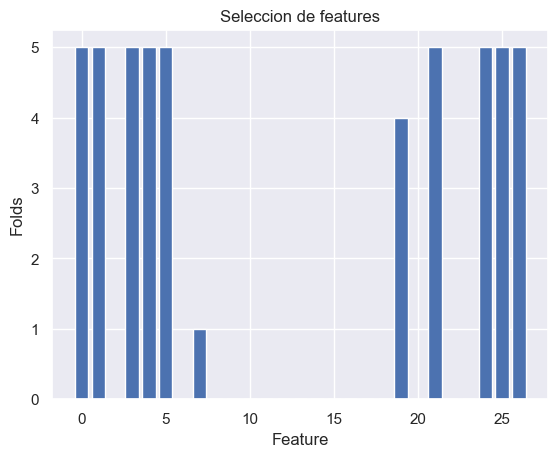

El AUC promedio es:
0.8529049470928867


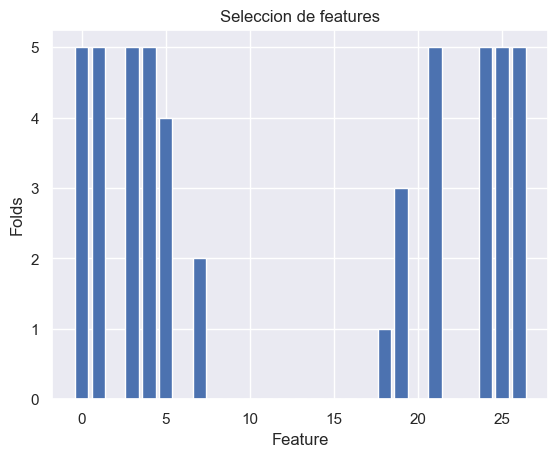

El AUC promedio es:
0.8549601242347762


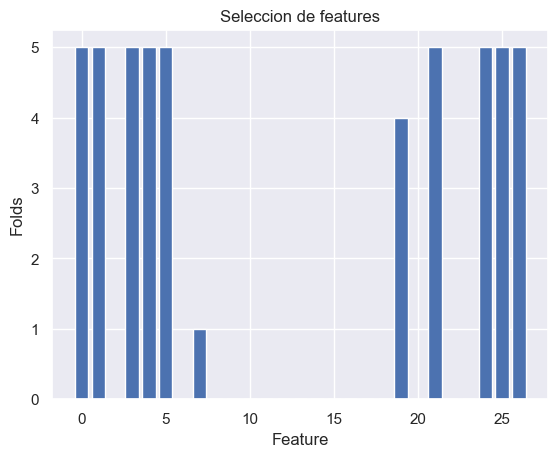

El AUC promedio es:
0.8703168874184699


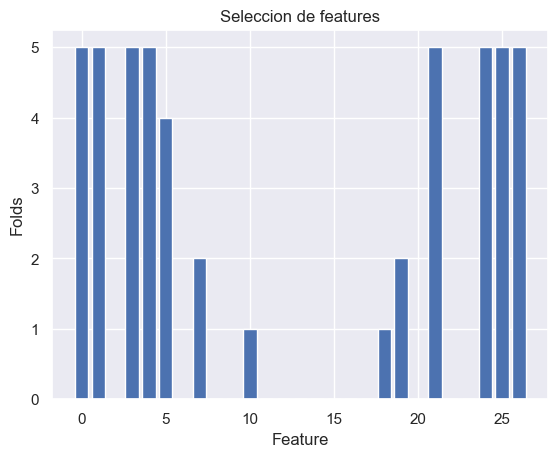

In [46]:
FeatureBest(X_one_hot_all,y,model_Logistic, 10)
FeatureBest(X_one_hot_all,y,model_Tree, 10)
FeatureBest(X_one_hot_all,y,model_Tree, 10)
FeatureBest(X_one_hot_all,y,rf, 10)
#FeatureBest(X_one_hot_all,y,model, 10)

Vemos que el AUC promedio obtenido con los K=10 mejores features no es mejor que el AUC obtenido con todos. Esto significa que en este dataset la clasificación no esta basada en un conjunto pequeño de features muy diferentes entre las dos clases, sino que todas parecen contribuir.